## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## CLASE 3: WEBSCRAPING 1

In [ ]:
!pip3 install beautifulsoup4 --user
!pip3 install lxml --user
!pip3 install html5lib --user
!pip3 install image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.9 MB 5.2 MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19496 sha256=ccdc8b2f5844a36838917140dea96e3f3de8638ea379859f3f396933946eaa4c
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image


In [ ]:
#pip3 install beautifulsoup4 --user
#pip3 install lxml --user
#pip3 install html5lib --user
#pip3 install image

import requests
from bs4 import BeautifulSoup
#from PIL import Image
from os.path  import basename
from collections import Counter
import pandas as pd

import re
import nltk
import image

nltk.download("all")

#Wikipedia del Camp Nou
#Marca


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
soup = BeautifulSoup("<html><p>Hola <b>Mundo</p></html>")
print(soup)

<html><body><p>Hola <b>Mundo</b></p></body></html>


In [ ]:
soup = BeautifulSoup("<html><p>Hola <b>Mundo</p></html>", "html.parser")
print(soup)

<html><p>Hola <b>Mundo</b></p></html>


In [ ]:
soup = BeautifulSoup("<html><p>Hola <b>Mundo</p></html>", "xml")
print(soup)


<?xml version="1.0" encoding="utf-8"?>
<html><p>Hola <b>Mundo</b></p></html>


In [ ]:
soup = BeautifulSoup("<html><p>Hola <b>Mundo</p></html>", "html5lib")
print(soup)

<html><head></head><body><p>Hola <b>Mundo</b></p></body></html>


In [ ]:
# 1. Wikipedia del Camp Nou


In [ ]:
response=requests.get("https://es.wikipedia.org/wiki/Camp_Nou")

In [ ]:
response

<Response [200]>

In [ ]:
soup=BeautifulSoup(response.text)

In [ ]:
soup.find_all("h3")

[<h3><span id="Construcci.C3.B3n"></span><span class="mw-headline" id="Construcción">Construcción</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=2" title="Editar sección: Construcción">editar</a><span class="mw-editsection-bracket">]</span></span></h3>,
 <h3><span id="Inauguraci.C3.B3n"></span><span class="mw-headline" id="Inauguración">Inauguración</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=3" title="Editar sección: Inauguración">editar</a><span class="mw-editsection-bracket">]</span></span></h3>,
 <h3><span class="mw-headline" id="Nombre_del_estadio">Nombre del estadio</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=4" title="Editar sección: Nombre del estadio">editar</a><span class="mw-edits

In [ ]:
texto=soup.find_all("h3")
texto

[<h3><span id="Construcci.C3.B3n"></span><span class="mw-headline" id="Construcción">Construcción</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=2" title="Editar sección: Construcción">editar</a><span class="mw-editsection-bracket">]</span></span></h3>,
 <h3><span id="Inauguraci.C3.B3n"></span><span class="mw-headline" id="Inauguración">Inauguración</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=3" title="Editar sección: Inauguración">editar</a><span class="mw-editsection-bracket">]</span></span></h3>,
 <h3><span class="mw-headline" id="Nombre_del_estadio">Nombre del estadio</span><span class="mw-editsection"><span class="mw-editsection-bracket">[</span><a href="/w/index.php?title=Camp_Nou&amp;action=edit&amp;section=4" title="Editar sección: Nombre del estadio">editar</a><span class="mw-edits

In [ ]:
for i in texto: 
    print(i.text) 

Construcción[editar]
Inauguración[editar]
Nombre del estadio[editar]
Proyecto Foster[editar]
Espai Barça[editar]
Selección española[editar]
Eurocopa 1964[editar]
Mundial 1982[editar]
Finales continentales[editar]
Finales nacionales[editar]
Partidos de aniversario[editar]
Partidos de homenaje[editar]
Música[editar]
Rugby[editar]

Herramientas personales


Espacios de nombres


Vistas


Buscar


Navegación


Herramientas


Imprimir/exportar


En otros proyectos


En otros idiomas



In [ ]:
soup.find("table", class_="infobox")
tabla=soup.find("table", class_="infobox")
tabla

<table class="infobox" style="width:22.7em; line-height: 1.4em; text-align:left; padding:.23em;"><tbody><tr><th class="cabecera deporte" colspan="3" style="text-align:center;background-color:#ddd;color:black;color:#000;">Camp Nou</th></tr><tr><td class="imagen" colspan="3" style="text-align:center;font-size: 92%;;">
<a class="image" href="/wiki/Archivo:2014._Camp_Nou._M%C3%A9s_que_un_club._Barcelona_B40.jpg"><img alt="2014. Camp Nou. Més que un club. Barcelona B40.jpg" data-file-height="2732" data-file-width="5240" decoding="async" height="156" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/2014._Camp_Nou._M%C3%A9s_que_un_club._Barcelona_B40.jpg/300px-2014._Camp_Nou._M%C3%A9s_que_un_club._Barcelona_B40.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/2014._Camp_Nou._M%C3%A9s_que_un_club._Barcelona_B40.jpg/450px-2014._Camp_Nou._M%C3%A9s_que_un_club._Barcelona_B40.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a9/2014._Camp_Nou._M%C3%A9s_que_un_club.

In [ ]:
print(tabla.text)

Camp Nou
Estadio de máxima categoría UEFANombre completo
Spotify Camp NouNombres anteriores

Ver listaEstadio del Club de Fútbol Barcelona (1957-1973)Estadi del Futbol Club Barcelona (1973-2001)Camp Nou (2001-2022)
Propietario
Fútbol Club BarcelonaOperador
Fútbol Club BarcelonaLocalizaciónPaís
 EspañaLocalidad
C/ Aristides Maillol, 12, 08028 Barcelona, EspañaCoordenadas
41°22′51″N 2°07′21″E﻿ / ﻿41.380833, 2.1225Detalles técnicosSuperficie
Césped híbrido GrassMaster[1]​ (5% Fibras sintéticas, 95% césped natural)Dimensiones
105×68 mCapacidad
99 354[2]​ espectadoresConstrucciónCoste
288 000 000 ₧(56 416 000 €)Inicio
28 de marzo de 1954[3]​Apertura
24 de septiembre de 1957 (65 años)Remodelación
2026 previsión[4]​Ampliación
1982, 1994,[5]​ 2026 previsión[4]​Equipo diseñadorArquitecto
Francesc MitjansJosep SoterasLorenzo García-BarbónEquipo local
Fútbol Club BarcelonaAcontecimientos

Sede de Copa del MundoMundial 1982 (inaugural)


Sede de Campeonato de EuropaEurocopa 1964 (semifinal)


Sede

In [ ]:

#Marca
response=requests.get("https://www.marca.com/")
soup=BeautifulSoup(response.text,"html.parser")

In [ ]:
texto=soup.find_all(text=True)


In [ ]:
texto

[' ',
 'html',
 '/\\/radio(\\/parrilla)?.html/gmi.test(location.href||"")&&/MSIE|Trident/gm.test(navigator.userAgent||"")&&!!window.MSInputMethodContext&&!!document.documentMode&&function(){var a=document.createElement("script");a.src="//e00-elmundo.uecdn.es/js/ue-polyfills.min.js",a.type="text/javascript";var b=document.getElementsByTagName("script")[0];b.parentNode.insertBefore(a,b)}();',
 '\n',
 '\n',
 'window.googlefc=window.googlefc||{},window.googlefc.ccpa=window.googlefc.ccpa||{},window.googlefc.callbackQueue=window.googlefc.callbackQueue||[],googlefc.callbackQueue.push({AD_BLOCK_DATA_READY:()=>{var o;switch(googlefc.getAdBlockerStatus()){case googlefc.AdBlockerStatusEnum.EXTENSION_LEVEL_AD_BLOCKER:case googlefc.AdBlockerStatusEnum.NETWORK_LEVEL_AD_BLOCKER:o="bloqueada";break;case googlefc.AdBlockerStatusEnum.NO_AD_BLOCKER:o="no bloqueada";break;case googlefc.AdBlockerStatusEnum.UNKNOWN:default:o="sin datos"}console.log("GFC status: "+o);try{localStorage.setItem("be_adblocking",

In [ ]:
for i in texto:
    print(i.parent.name)
    print(i)



Se han truncado las últimas 5000 líneas del flujo de salida.
li


a


span


span


a


span
Sevilla
a


li


ul


li


a


span


span


a


span
Valencia
a


li


ul


li


a


span


span


a


span
Valladolid
a


li


ul


li


a


span


span


a


span
Villareal
a


li


ul


div


ul


li


span
Destacamos
li


ul


li


a
Atletismo
li


ul


li


a
Balonmano
li


ul


li


a
Ciclismo
li


ul


li


a
Golf
li


ul


li


a
Tenis
li


ul


li


a
Boxeo
li


ul


li


ul


li


a
Otros deportes
li


ul


li


a
Ajedrez
li


ul


li


a
Deportes Aventura
li


ul


li


a
Deportes Invierno
li


ul


li


a
eSports
li


ul


li


a
Hípica
li


ul


li


a
Hockey Hierba
li


ul


li


a
Hockey Patines
li


ul


li


a
Juegos Olímpicos
li


ul


li


a
Juegos Olímpicos de Invierno
li


ul


li


ul


li


ul


li


a
MMA
li


ul


li


a
Natación
li


ul


li


a
NFL
li


ul


li


a
NHL
li


ul


li


a
Olimpismo
li


ul


li


a
Pádel
li


ul


li


a
Paralímpicos
li


ul


li


a
Ru

In [ ]:
blacklist= [
    '[document]',
    'noscript',
    'header',
    'html',
    'meta',
    'head',
    'input',
    'script',
]

In [ ]:

palabras=[]
for t in texto:
    if t.parent.name not in blacklist:
        palabras.append(t)

palabras


['MARCA - Diario online líder en información deportiva',
 ' ##FBEXCLU ',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Es noticia: ',
 'Sorteo Copa del Rey',
 'Fernando Alonso FIA',
 'Verstappen F1 EEUU',
 'Mbappe contrato PSG',
 'Gavi lesion',
 'Modric baja',
 'Athletic Camp Nou',
 'Alcaraz donde ver',
 'Real Madrid Copa del Rey',
 'Marquez GP Malasia',
 'Guerra Ucrania - Rusia',
 'Hiba Abouk',
 'Jaime Cantizano',
 'Kiko Rivera',
 'Ibai Llanos',
 'Boris Izaguirre operaciones',
 'Ana Morgade',
 'Dahmer',
 'Precio luz hoy',
 'Calendario Champions',
 'Calendario F1 2022',
 'Calendario Liga',
 'Calendario Mundial 2022',
 'Resultados fútbol',
 'Portada de Marca',
 '\n',
 '\n',
 '\n',
 'La portada de hoy',
 'Fede Valverde la rompe',
 '\n',
 '\n',
 'Radio MARCA',
 'Cerrar',
 '\n',
 '\n',
 '\n',
 'CuídatePlus',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'Edición seleccionada',
 '\nES ',
 '\n',
 '\n',
 '\n',
 'Ediciones:',
 '\n',
 '\n',
 '\n',
 '\nES (España)\n',
 '\n',
 '\n

In [ ]:
palabras_juntas = ' '.join(palabras)


In [ ]:
palabras_juntas


'MARCA - Diario online líder en información deportiva  ##FBEXCLU  \n \n \n \n \n \n \n \n \n \n Es noticia:  Sorteo Copa del Rey Fernando Alonso FIA Verstappen F1 EEUU Mbappe contrato PSG Gavi lesion Modric baja Athletic Camp Nou Alcaraz donde ver Real Madrid Copa del Rey Marquez GP Malasia Guerra Ucrania - Rusia Hiba Abouk Jaime Cantizano Kiko Rivera Ibai Llanos Boris Izaguirre operaciones Ana Morgade Dahmer Precio luz hoy Calendario Champions Calendario F1 2022 Calendario Liga Calendario Mundial 2022 Resultados fútbol Portada de Marca \n \n \n La portada de hoy Fede Valverde la rompe \n \n Radio MARCA Cerrar \n \n \n CuídatePlus \n \n \n \n \n Edición seleccionada \nES  \n \n \n Ediciones: \n \n \n \nES (España)\n \n \n \n EN (English)\n \n \n \n \nMX (México)\n \n \n \n \nCO (Colombia)\n \n \n \n \nAR (Argentina)\n \n \n \n \nUS (USA)\n \n \n \n \n \n \n \nEscoge tu edición de Marca.com favorita\n \n \n \n \nSiempre que entres en Marca.com se cargará esta edición\n \n \n \n ES (Espa

In [ ]:
from nltk.tokenize import RegexpTokenizer

In [ ]:

tokenizer = RegexpTokenizer(r'\w+')
tokenizer


RegexpTokenizer(pattern='\\w+', gaps=False, discard_empty=True, flags=<RegexFlag.UNICODE|DOTALL|MULTILINE: 56>)

In [ ]:
tokens_lower = tokenizer.tokenize(palabras_juntas.lower())
tokens_lower

['marca',
 'diario',
 'online',
 'líder',
 'en',
 'información',
 'deportiva',
 'fbexclu',
 'es',
 'noticia',
 'sorteo',
 'copa',
 'del',
 'rey',
 'fernando',
 'alonso',
 'fia',
 'verstappen',
 'f1',
 'eeuu',
 'mbappe',
 'contrato',
 'psg',
 'gavi',
 'lesion',
 'modric',
 'baja',
 'athletic',
 'camp',
 'nou',
 'alcaraz',
 'donde',
 'ver',
 'real',
 'madrid',
 'copa',
 'del',
 'rey',
 'marquez',
 'gp',
 'malasia',
 'guerra',
 'ucrania',
 'rusia',
 'hiba',
 'abouk',
 'jaime',
 'cantizano',
 'kiko',
 'rivera',
 'ibai',
 'llanos',
 'boris',
 'izaguirre',
 'operaciones',
 'ana',
 'morgade',
 'dahmer',
 'precio',
 'luz',
 'hoy',
 'calendario',
 'champions',
 'calendario',
 'f1',
 '2022',
 'calendario',
 'liga',
 'calendario',
 'mundial',
 '2022',
 'resultados',
 'fútbol',
 'portada',
 'de',
 'marca',
 'la',
 'portada',
 'de',
 'hoy',
 'fede',
 'valverde',
 'la',
 'rompe',
 'radio',
 'marca',
 'cerrar',
 'cuídateplus',
 'edición',
 'seleccionada',
 'es',
 'ediciones',
 'es',
 'españa',
 'en',

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('spanish'))

league           18
mundial          15
madrid           14
copa             13
2022             12
premier          12
fútbol           11
messi            11
da               10
cristiano         9
liga              9
gp                9
primera           9
así               8
haaland           8
real              7
final             7
alonso            7
supercopa         7
rey               7
mejor             7
femenina          7
argentina         7
laliga            7
rodríguez         7
tras              6
historia          6
16                6
ronaldo           6
f1                6
psg               6
puede             6
nba               5
goles             5
unidad            5
pilotos           5
editorial         5
internacional     5
tan               5
europa            5
baloncesto        5
river             5
boca              5
título            5
mbappé            5
eeuu              5
fia               5
premios           5
meter             4
18                4


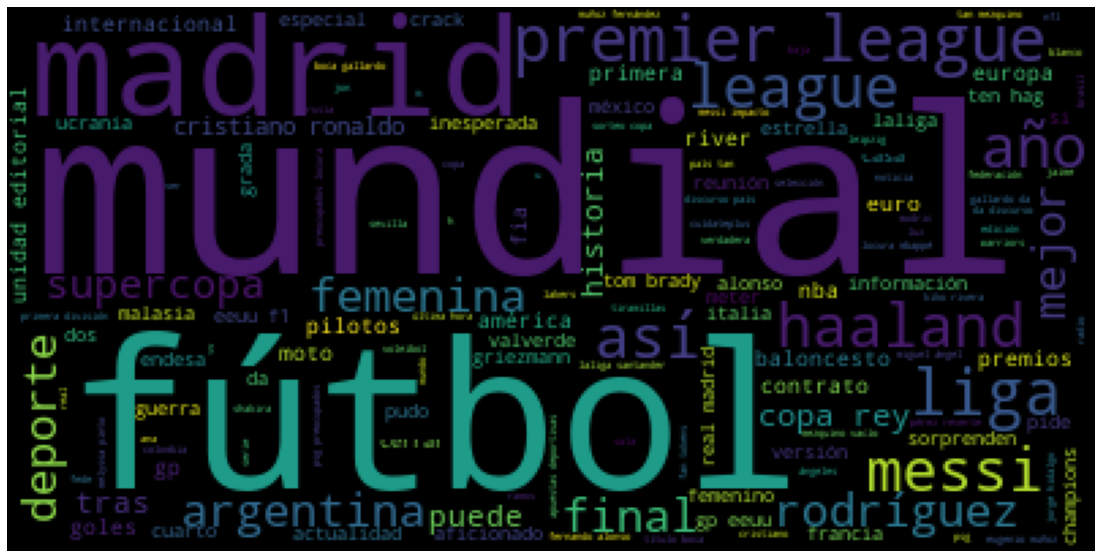

In [ ]:
stop_words.add("comentarios")
stop_words |= {"redacción","calendario","equipo","equipos","directo","clasificación","marca","resultados","vídeo","coches","españa","0","2","1","item","b","19","3","mod","portada"}

stop_words

tokens_limpios=[]
for i in tokens_lower:
    if i not in stop_words:
        tokens_limpios.append(i)

df=pd.DataFrame(tokens_limpios)

print(df[0].value_counts()[:50])

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


text =" ".join(df[0])

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

text
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()